# Lab 7.04 - Time series analysis

In [1]:
# Package imports for data science and time series analysis in particular
import numpy as np                                  # "Scientific computing"
import pandas as pd                                 # Dataframe
import scipy.stats as stats                         # Statistical tests

import matplotlib.pyplot as plt                     # Basic visualisation
import seaborn as sns                               # Advanced dataviz

from sklearn.linear_model import LinearRegression   # Linear regression model

# Time series analysis
from datetime import datetime
from sklearn.metrics import mean_absolute_error,mean_squared_error
from statsmodels.tsa.api import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose


### Exercise 4 - Airline ticket data

Consider the airline ticket data in the file airline ticket data.csv  

- Create a time series chart of the data. Based on what you see, which of the exponential smoothing models do you think should be used for forecasting? Why?
- Create and train the model. Predict the values for the next 12 months.
- Create a plot with the airline ticket data, the fitted values and the predicted values for the next 12 months.

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/airline%20ticket%20data.csv', delimiter = ";", parse_dates=['Month']).set_index(['Month'])
data.head()

/var/folders/h_/vyg28tk10_dd_sh__hkzvk240000gn/T/ipykernel_20427/2002784438.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/airline%20ticket%20data.csv', delimiter = ";", parse_dates=['Month']).set_index(['Month'])


,Tickets
Month,
2018-01-01,605
2018-02-01,647
2018-03-01,636
2018-04-01,612
2018-05-01,714


<Axes: xlabel='Month'>

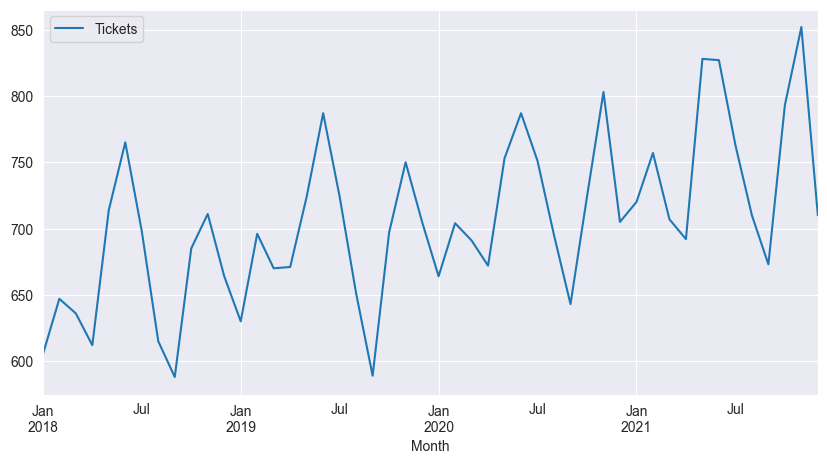

In [4]:
data.plot( y='Tickets', figsize=[10,5])

<Axes: xlabel='Month'>

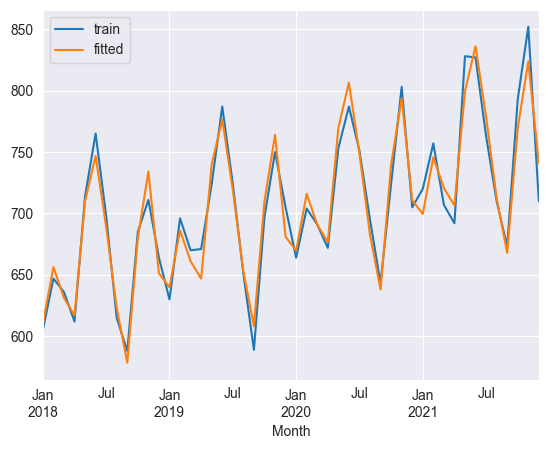

In [8]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

train = data.Tickets

tickets_hw = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12, freq='MS').fit()

train.plot(legend=True, label='train')
(tickets_hw.level + tickets_hw.season).plot(legend=True, label='fitted')

In [9]:
data['fittedvalues'] = tickets_hw.fittedvalues
data.head()

,Tickets,fittedvalues
Month,,
2018-01-01,605,610.102988
2018-02-01,647,656.338890
2018-03-01,636,631.300792
2018-04-01,612,617.050422
2018-05-01,714,710.021092


Text(0.5, 1.0, 'Train, fitted & predicted values using Holt-Winters')

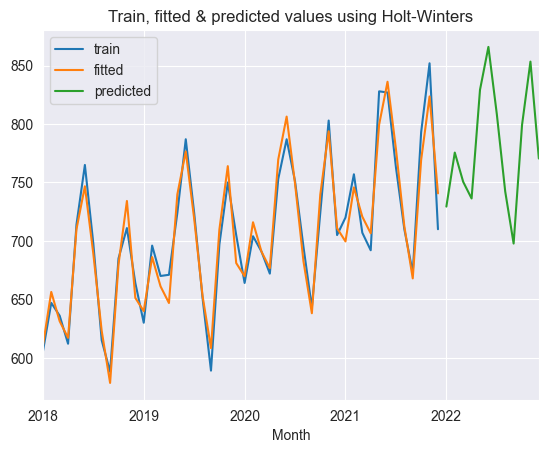

In [10]:
tickets_predicted = tickets_hw.forecast(12)

train.plot(legend=True, label='train')
tickets_hw.fittedvalues.plot(legend=True, label='fitted')

tickets_predicted.plot(legend=True, label='predicted')

plt.title('Train, fitted & predicted values using Holt-Winters')


## Source
Business Analytics Data Analysis & Decision Making 